In [1]:
# importy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
# wyświetlanie drzew decyzyjnych
import graphviz
from sklearn.tree import export_graphviz

def display_tree(tree, feature_names):
    dot_data = export_graphviz(
        tree, out_file=None, 
        feature_names=feature_names, label='root', 
        filled=True, impurity=False)
    display(graphviz.Source(dot_data))

In [3]:
# formatowanie wykresów
def prettify():
    plt.xlim(['20170101', '20170430'])  # zakres osi x
    plt.axvspan('20170201', '20170301', color='black', alpha=0.1)  # luty na szaro
    plt.axvspan('20170401', '20170501', color='black', alpha=0.1);  # kwiecień na szaro

    locator = mdates.MonthLocator()
    fmt = mdates.DateFormatter('%b')
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.legend()

In [4]:
# domyślne ustawienia formatowania wykresów
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['figure.dpi'] = 2*72.0
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14.0

# Załadowanie danych

In [5]:
data = pd.read_csv('data.csv', parse_dates=True, index_col='date')
data[:5]

,yearday,weekday,month,day,sales
date,,,,,
2017-01-01,1,6,1,1,102.707643
2017-01-02,2,0,1,2,896.551872
2017-01-03,3,1,1,3,1050.296019
2017-01-04,4,2,1,4,924.917272
2017-01-05,5,3,1,5,949.985491


# Wizualizacja danych

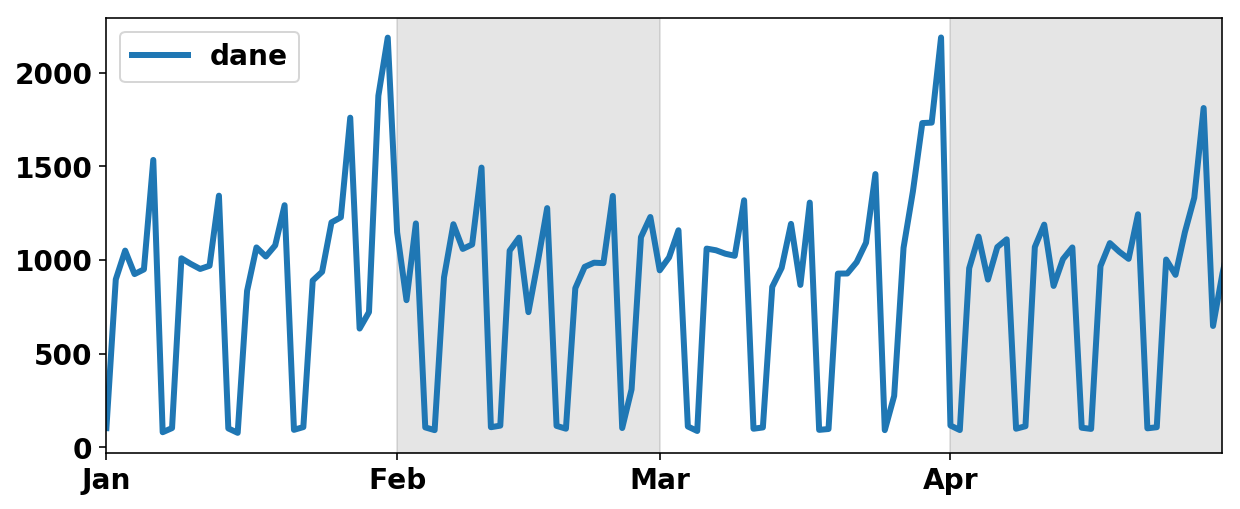

In [6]:
plt.plot(data.sales, label='dane')
prettify()

# Sezonowość miesięczna

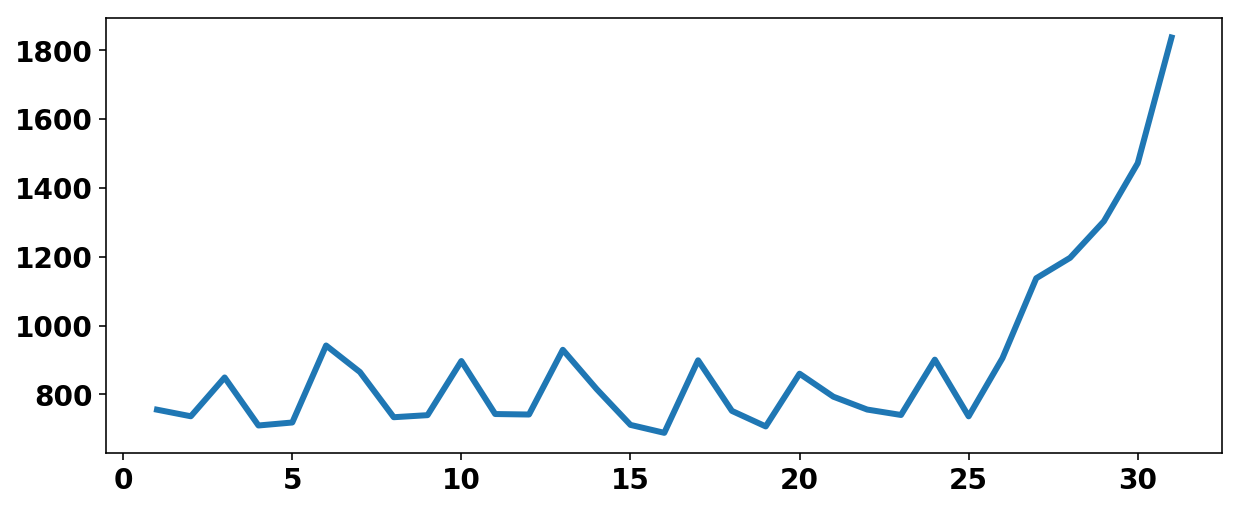

In [7]:
plt.plot(data.groupby('day').mean().sales);

# Sezonowość tygodniowa

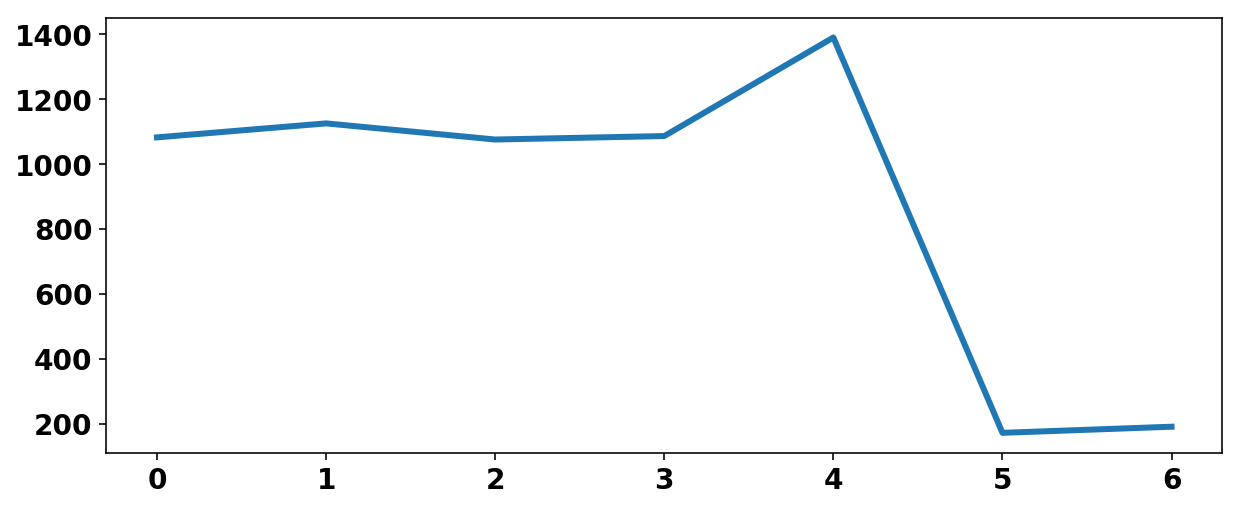

In [8]:
plt.plot(data.groupby('weekday').mean().sales);

# Wejście = yearday

In [9]:
tree = DecisionTreeRegressor(random_state=0, max_leaf_nodes=4) # stworzenie modelu
tree.fit(X=data.yearday.values.reshape(-1, 1), y=data.sales)   # trenowanie/uczenie
prediction = tree.predict(data.yearday.values.reshape(-1, 1))  # predykcja

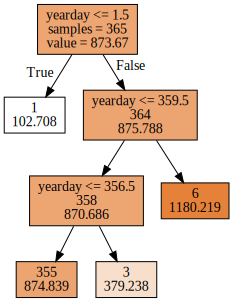

In [10]:
display_tree(tree, ['yearday'])

# Rezultat

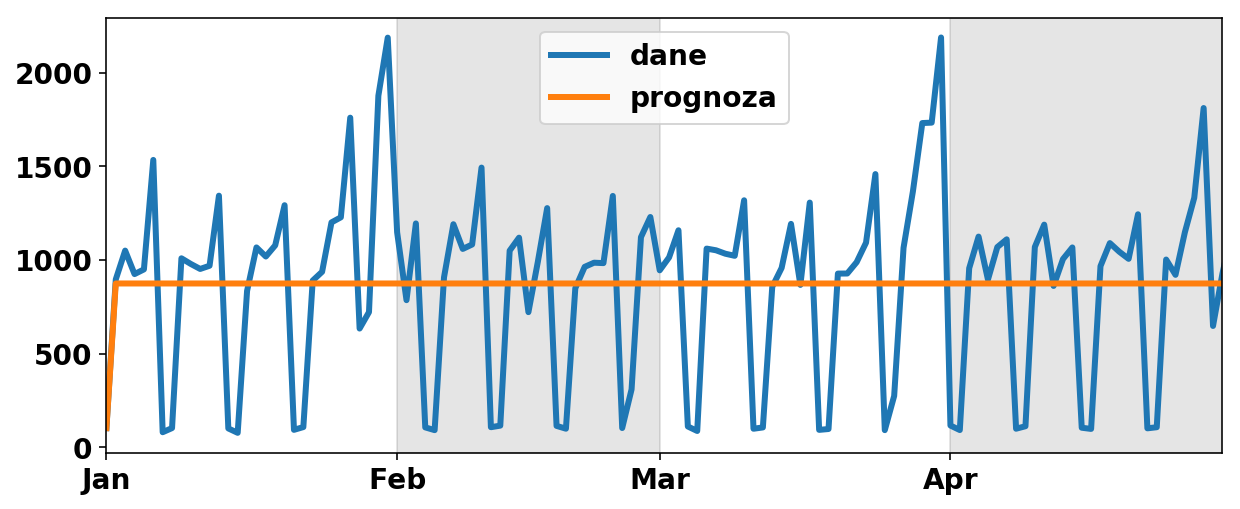

In [11]:
plt.plot(data.sales, label='dane')  # niebieski wykres 
plt.plot(data.index, prediction, label='prognoza')  # żółty wykres
prettify()

# Wejście = weekday &amp; day

In [12]:
tree_2 = DecisionTreeRegressor(random_state=0, max_leaf_nodes=4)  # stworzenie modelu
tree_2.fit(X=data[['weekday', 'day']], y=data.sales)              # trenowanie/uczenie
prediction_2 = tree_2.predict(data[['weekday', 'day']])           # predykcja

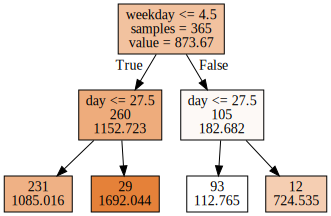

In [13]:
display_tree(tree_2, ['weekday', 'day'])

# Rezultat

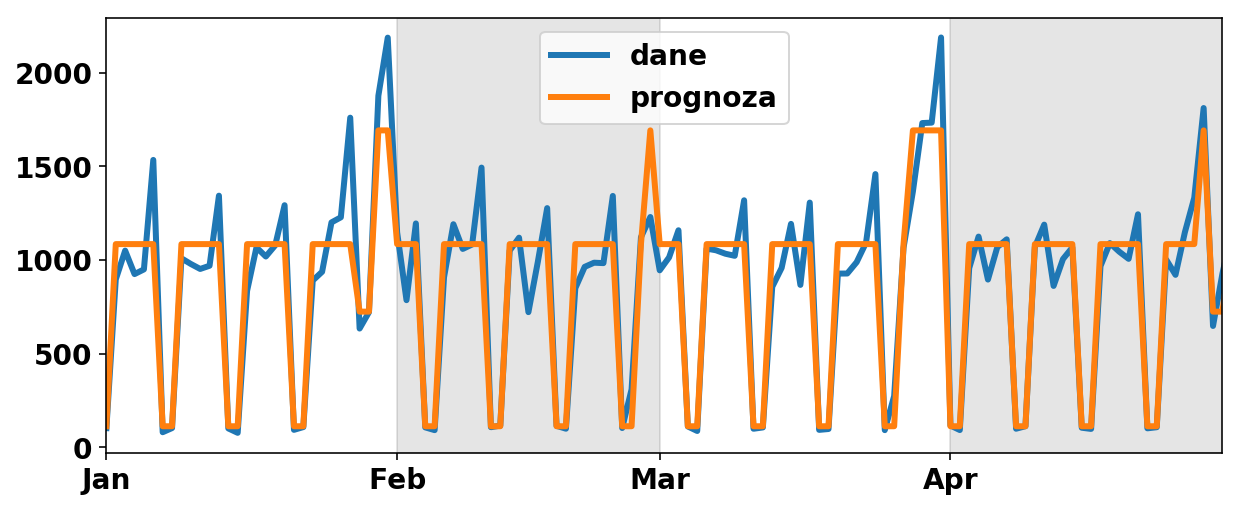

In [14]:
plt.plot(data.sales, label='dane')  # niebieski wykres
plt.plot(data.index, prediction_2, label='prognoza')  # żółty wykres
prettify()